In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)

In [3]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(protoss_data) if x not in no_normalize]

#Normalizing these columns
norm = protoss_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
protoss_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=protoss_data.index)

#One-hot Encoding the categorical variables
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['map_name'], prefix='Map'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['region'], prefix='Region'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(protoss_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(protoss_data_normalized.head(5), protoss_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.099174,0.045685,0.032967,0.004451,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.099174,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.310056,0.107438,0.055838,0.032967,0.004451,0.170858,0.03750,0.001457,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.107438,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0.365922,0.123967,0.065990,0.050549,0.010237,0.203760,0.03125,0.007287,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.123967,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.296089,0.148760,0.081218,0.050549,0.012017,0.223502,0.05000,0.013844,0.0,0.0,0.001263,0.022077,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.148760,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.304469,0.157025,0.086294,0.050549,0.005786,0.210341,0.15000,0.015302,0.0,0.0,0.005893,0.055695,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.157025,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
76318,0.290503,0.462810,0.558376,0.30989,0.044063,0.506463,0.15625,0.279073,0.215424,0.098810,0.051773,0.471651,0.133929,0.143541,0.132948,0.033220,0.0,0.000000,0.333333,0.0,0.222222,0.5,0.0,0.0,0.00,0.0,0.5,0.0,0.000000,0.058824,0.0,0.0,0.0,0.3,0.2,0.0,0.0,0.018519,0.462810,0.300,0.0,0.5,0.25,0.047619,0.0,0.12500,0.0,0.0,0.5,0.5,0.0,0.363636,0.0,0.250,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
76319,0.324022,0.462810,0.619289,0.30989,0.009792,0.519624,0.22500,0.292918,0.249819,0.102927,0.036620,0.505268,0.178571,0.179426,0.176301,0.033220,0.0,0.000000,0.333333,0.0,0.222222,0.5,0.0,0.0,0.00,0.0,0.5,0.0,0.000000,0.058824,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.018519,0.462810,0.300,0.0,0.5,0.25,0.047619,0.0,0.21875,0.0,0.0,0.5,0.5,0.0,0.363636,0.0,0.175,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
76320,0.279330,0.462810,0.675127,0.30989,0.011572,0.466980,0.21875,0.311862,0.264301,0.104300,0.009681,0.483191,0.223214,0.208134,0.176301,0.033220,0.0,0.055556,0.333333,0.0,0.222222,0.5,0.0,0.0,0.00,0.0,0.5,0.0,0.090909,0.058824,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.018519,0.462810,0.325,0.0,0.5,0.25,0.047619,0.0,0.21875,0.0,0.0,0.5,0.5,0.0,0.363636,0.0,0.225,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
76321,0.053073,0.454545,0.680203,0.30989,0.037832,0.473561,0.00000,0.334451,0.313179,0.110132,0.047143,0.516809,0.000000,0.258373,0.236994,0.036627,0.0,0.055556,0.333333,0.0,0.333333,0.5,0.0,0.0,0.05,0.0,0.5,0.0,0.000000,0.058824,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.018519,0.454545,0.300,0.0,0.5,0.25,0.047619,0.0,0.18750,0.0,0.0,0.5,0.5,0.0,0.363636,0.0,0.300,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
76322,0.000000,0.454545,0.395939,0.30989,0.051184,0.513043,0.00000,0.244827,0.090514,0.160567,0.082921,0.483191,0.000000,0.114833,0.063584,0.087734,0.0,0.000000

In [4]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_normalized) if x not in no_X]

Y = protoss_data_normalized['win']
X_normalized = protoss_data_normalized[yes_X]

In [5]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [6]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [7]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [8]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(48847, 1)
(12211, 1)
(15265, 1)


In [10]:
print(X_normalized_train.shape)
print(X_normalized_val.shape)
print(X_normalized_test.shape)

(48847, 123)
(12211, 123)
(15265, 123)


In [11]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_normalized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_normalized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_normalized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [12]:
val_performance = {}
performance = {}

In [13]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.7063 - binary_accuracy: 0.5228 - precision: 0.5291 - recall: 0.5163 - val_loss: 0.7201 - val_binary_accuracy: 0.4961 - val_precision: 0.4968 - val_recall: 0.9873
Epoch 2/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6977 - binary_accuracy: 0.5412 - precision: 0.5467 - recall: 0.5443 - val_loss: 0.7128 - val_binary_accuracy: 0.5079 - val_precision: 0.5030 - val_recall: 0.91336956 - binary_accuracy: 0.542 - ETA: 0s - loss: 0.6976 - binary_accuracy: 0.5401 - precision: 0.5450 - reca
Epoch 3/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6926 - binary_accuracy: 0.5484 - precision: 0.5533 - recall: 0.5572 - val_loss: 0.7078 - val_binary_accuracy: 0.5148 - val_precision: 0.5076 - val_recall: 0.8328
Epoch 4/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6892 - binary_accuracy: 0.5514 - precision: 0.5561 - recall: 0.5614 - val_loss: 0.7041 

1527/1527 [==============================] - 13s 8ms/step - loss: 0.6723 - binary_accuracy: 0.5754 - precision: 0.5801 - recall: 0.5819 - val_loss: 0.6938 - val_binary_accuracy: 0.5368 - val_precision: 0.5379 - val_recall: 0.4909
Epoch 22/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6716 - binary_accuracy: 0.5761 - precision: 0.5808 - recall: 0.5825 - val_loss: 0.6936 - val_binary_accuracy: 0.5371 - val_precision: 0.5383 - val_recall: 0.4909
Epoch 23/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6709 - binary_accuracy: 0.5769 - precision: 0.5816 - recall: 0.5837 - val_loss: 0.6934 - val_binary_accuracy: 0.5381 - val_precision: 0.5392 - val_recall: 0.49336737 - binary_accuracy: 0.5709 - pr - ETA: 1s - loss: 0.6720 
Epoch 24/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6700 - binary_accuracy: 0.5782 - precision: 0.5828 - recall: 0.5851 - val_loss: 0.6931 - val_binary_accuracy: 0.5387 - val_precision: 0.5395 -

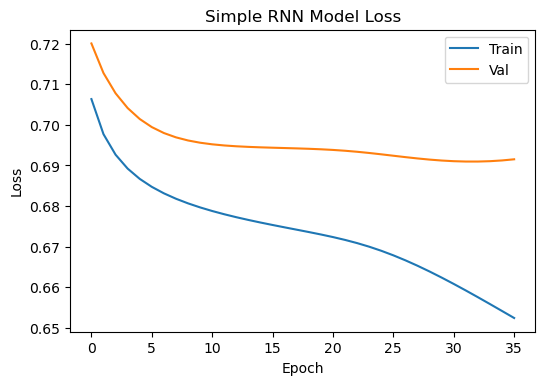

In [14]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [15]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6966 - binary_accuracy: 0.5164 - precision_1: 0.5201 - recall_1: 0.5694 - auc: 0.5168 - val_loss: 0.6985 - val_binary_accuracy: 0.4976 - val_precision_1: 0.4976 - val_recall_1: 1.0000 - val_auc: 0.5270ary_accuracy: 0.5089 - precision_1: 0.5195 - re - ETA: 3s - loss: 0.6965 - binary_accuracy: 0.5170 - precision_1: 0.5195 - recall_1 - ETA: 3s - loss: 0.6965 - binary_accuracy: 0.5180 - precision_1: 0.5200 - recall_1: 0.5218 - ETA: 2s - loss: 0.6963 - binary_accuracy: 0.5174 - precision_1: 0.5190 - recall_1: 0.5418 - auc: 0. - ETA: 2s - loss: 0.6964 - binary_accuracy: 0.5169 - precision_1: 0.5185 - recall_1: 0.5452 - auc:  - ETA: 2s - loss: 0.6962 - bina - ETA: 0s - loss: 0.6966 - binary_accuracy: 0.5157 - precision_1: 0.5187 - recall_1: 0.5564
Epoch 2/100
1527/1527 [==============================] - 13s 8ms/step - loss: 0.6929 - binary

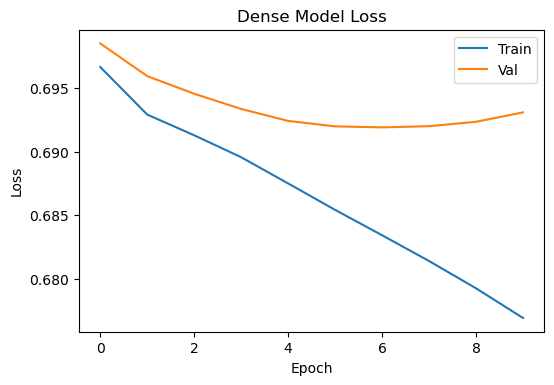

In [16]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [17]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 14s 9ms/step - loss: 0.6960 - binary_accuracy: 0.5153 - precision_2: 0.5201 - recall_2: 0.5428 - auc_1: 0.5119 - val_loss: 0.6925 - val_binary_accuracy: 0.5156 - val_precision_2: 0.5095 - val_recall_2: 0.7149 - val_auc_1: 0.5299accuracy: 0.4873 - precision_ - ETA: 8s - loss: 0.6976 - binary_accuracy: 0.5124 - precision_2: - ETA: 1s - loss: 0.6964 - binary_accuracy: 0.5164 - pr
Epoch 2/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6901 - binary_accuracy: 0.5352 - precision_2: 0.5365 - recall_2: 0.5978 - auc_1: 0.5459 - val_loss: 0.6926 - val_binary_accuracy: 0.5206 - val_precision_2: 0.5141 - val_recall_2: 0.6687 - val_auc_1: 0.535414 - prec - ETA: 7s - loss: 0.6911 - binary_accuracy: 0.5357 - precision_2: 0.5433 - recall_2: 0.6707 - ETA: 7s - loss: 0.6906 - binary_accuracy: 0.5347 - precision_2: 0.5402 - recall_2: 0.6946 - auc_1: 0. - ETA: 6s - loss: 0.6 - ETA: 4s - loss: 0.6910 - binary_accuracy: 0.5338

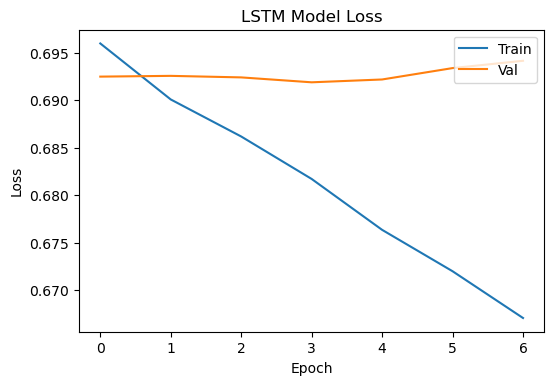

In [18]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [19]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1527/1527 [==============================] - 14s 9ms/step - loss: 0.7000 - binary_accuracy: 0.5117 - precision_3: 0.5172 - recall_3: 0.5227 - auc_2: 0.5119 - val_loss: 0.6945 - val_binary_accuracy: 0.5029 - val_precision_3: 0.5003 - val_recall_3: 0.7681 - val_auc_2: 0.5311 - binary_accuracy: 0.5093 - precision_3: 0
Epoch 2/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6899 - binary_accuracy: 0.5399 - precision_3: 0.5424 - recall_3: 0.5791 - auc_2: 0.5508 - val_loss: 0.6932 - val_binary_accuracy: 0.5187 - val_precision_3: 0.5125 - val_recall_3: 0.6723 - val_auc_2: 0.5373ETA: 6s - loss: 0.6906 - binary_accuracy: 0.5320 - precision_3: 0.5444 - recall
Epoch 3/100
1527/1527 [==============================] - 13s 9ms/step - loss: 0.6860 - binary_accuracy: 0.5529 - precision_3: 0.5562 - recall_3: 0.5762 - auc_2: 0.5696 - val_loss: 0.6931 - val_binary_accuracy: 0.5271 - val_precision_3: 0.5209 - val_recall_3: 0.6190 - val_auc_2: 0.5426curacy: 0.5366 - prec

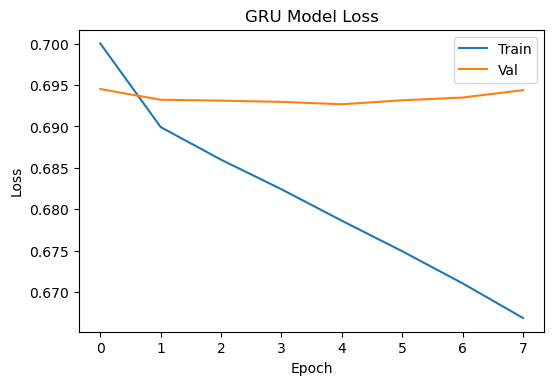

In [20]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()